In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class G:
  def __init__(self, r=0, i=0):
    self.re = r
    self.im = i

  def __add__(self, x):
    return G(self.re + x.re, self.im + x.im)

  def __sub__(self, x):
    return G(self.re - x.re, self.im - x.im)

  def __mul__(self, x):
    a = self.re
    b = self.im
    c = x.re
    d = x.im
    return G(a*c - b*d, a*d + b*c + b*d)

  def __str__(self):
    return str(self.re) + " + " + str(self.im) + "ω"

  def __repr__(self):
    return str(self)

  def coords(self):
    return self.re, self.im

  def norm(self):
    a = self.re
    b = self.im
    return a**2 + a*b + b**2

  def conjugate(self):
    return G(self.re + self.im, -self.im)

  def __truediv__(self, x):
    if x.norm() == 0:
      raise Exception("Division by zero")
    int_num = self * x.conjugate() # numerator of the complex quotient a / b
    a, b = int_num.coords()
    int_den = x.norm() # denominator of the complex quotient a / b
    a, b = a / int_den, b / int_den # components of the complex quotient a / b

    return G(a, b)

  def real(self):
    return self.re

  def imaginary(self):
    return self.im


In [3]:
def gauss_gcd_step(a, b):
  x, y = (a / b).coords()

  # u = x - (1 / math.sqrt(3)) * y
  # v = (2 / math.sqrt(3)) * y

  u, v = x, y

  qx, qy = math.floor(u + 0.5), math.floor(v + 0.5)

  q = G(qx, qy)

  r = a - q * b

  return q, r

In [4]:
# def gauss_gcd(a, b):
#   q, r = gauss_gcd_step(a, b)
#   steps = 1
#   while abs(r.norm()) > 0:
#     a, b = b, r
#     q, r = gauss_gcd_step(a, b)
#     steps += 1
#   return b, steps

In [5]:
def gauss_gcd(a, b):
  q, r = gauss_gcd_step(a, b)
  q1 = r
  steps = 1
  while r.norm() > 0:
    a, b = b, r
    q, r = gauss_gcd_step(a, b)
    steps += 1
    # if steps == 1:
    #   q1 = r
  return b, steps, q1

In [6]:
a = G(73, 41)
# 73 and 41
# 119 120

grid_size = 200

dividends = [G(x, y) for x in range(-grid_size, grid_size) for y in range(-grid_size, grid_size)]


In [7]:
steps = []
quots = []
for b in dividends:
  print(b)
  if b.norm() == 0:
    steps.append(1)
    quots.append(0)
    continue
  _, s, q = gauss_gcd(a, b)
  steps.append(s)
  quots.append(q.norm())

-200 + -200ω
-200 + -199ω
-200 + -198ω
-200 + -197ω
-200 + -196ω
-200 + -195ω
-200 + -194ω
-200 + -193ω
-200 + -192ω
-200 + -191ω
-200 + -190ω
-200 + -189ω
-200 + -188ω
-200 + -187ω
-200 + -186ω
-200 + -185ω
-200 + -184ω
-200 + -183ω
-200 + -182ω
-200 + -181ω
-200 + -180ω
-200 + -179ω
-200 + -178ω
-200 + -177ω
-200 + -176ω
-200 + -175ω
-200 + -174ω
-200 + -173ω
-200 + -172ω
-200 + -171ω
-200 + -170ω
-200 + -169ω
-200 + -168ω
-200 + -167ω
-200 + -166ω
-200 + -165ω
-200 + -164ω
-200 + -163ω
-200 + -162ω
-200 + -161ω
-200 + -160ω
-200 + -159ω
-200 + -158ω
-200 + -157ω
-200 + -156ω
-200 + -155ω
-200 + -154ω
-200 + -153ω
-200 + -152ω
-200 + -151ω
-200 + -150ω
-200 + -149ω
-200 + -148ω
-200 + -147ω
-200 + -146ω
-200 + -145ω
-200 + -144ω
-200 + -143ω
-200 + -142ω
-200 + -141ω
-200 + -140ω
-200 + -139ω
-200 + -138ω
-200 + -137ω
-200 + -136ω
-200 + -135ω
-200 + -134ω
-200 + -133ω
-200 + -132ω
-200 + -131ω
-200 + -130ω
-200 + -129ω
-200 + -128ω
-200 + -127ω
-200 + -126ω
-200 + -125ω
-200 + -124ω

In [8]:
def embed(x, y):
  return x + 0.5 * y, (np.sqrt(3) / 2) * y

In [9]:
xhex, yhex = [], []

for z in dividends:
    x, y = z.coords()
    X, Y = embed(x, y)
    xhex.append(X)
    yhex.append(Y)

In [10]:
assocs = [a, a * G(-1, 0), a * G(0,1), a * G(0,-1), a * G(-1, 1), a * G(1, -1)]

In [11]:
print((a * G(-1, 1) - a * G(1, -1)).norm())

40012


In [12]:
circ = lambda t, r: np.stack([r*np.cos(t), r*np.sin(t)], axis=1)

In [13]:
t_fine = np.linspace(0, 2*np.pi, 100)

pts = circ(t_fine, np.sqrt((a * G(-1, 1) - a * G(1, -1)).norm()) / 2)

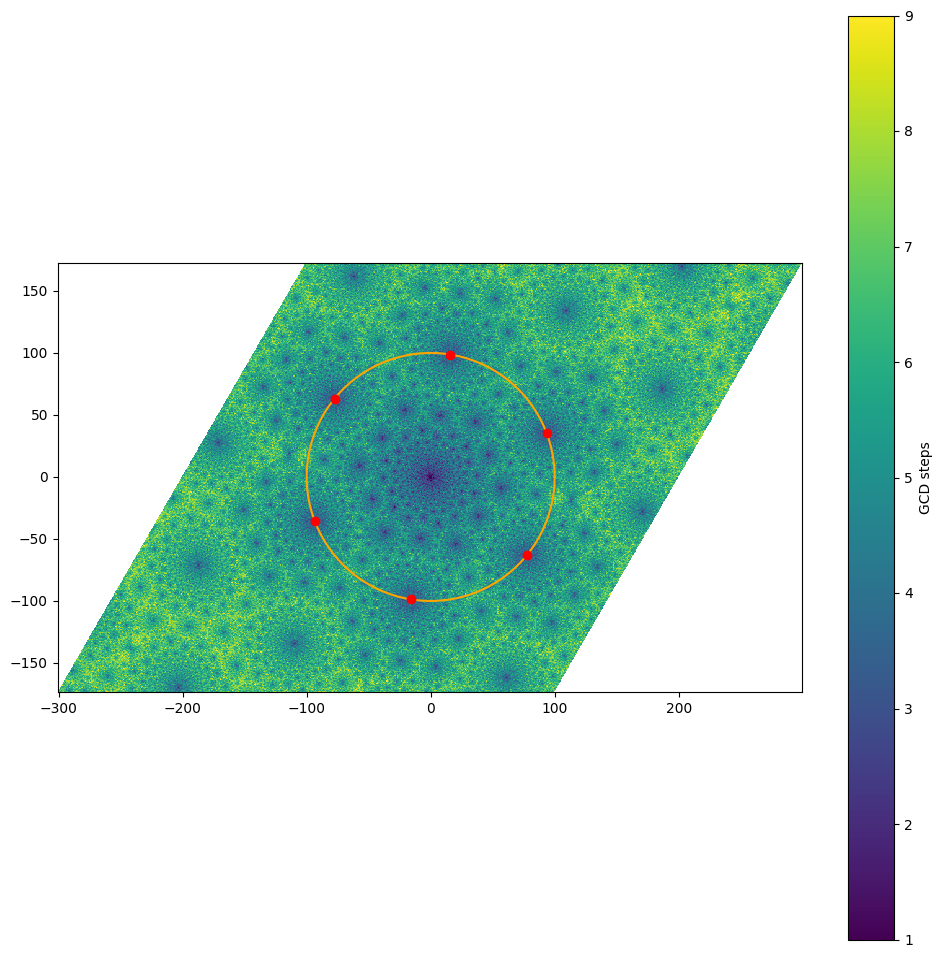

In [19]:
fig, ax = plt.subplots(figsize=(12, 12))

x, y = np.array(range(-grid_size, grid_size)), np.array(range(-grid_size, grid_size))
X, Y = np.meshgrid(x, y, indexing='ij')
X, Y = embed(X, Y)

Z = np.array(steps).reshape(len(x), len(y))

cf = plt.pcolormesh(
    X,
    Y,
    Z,
    cmap='viridis',
    shading='nearest'
)

plt.gca().set_aspect('equal')

for assoc in assocs:
    as_x, as_y = embed(assoc.real(), assoc.imaginary())
    ax.scatter(as_x, as_y, color='red', zorder=5)

plt.plot(pts[:,0], pts[:,1], color='orange')

plt.gca().set_aspect('equal')

cbar = plt.colorbar(cf)
cbar.set_label("GCD steps")

plt.show()

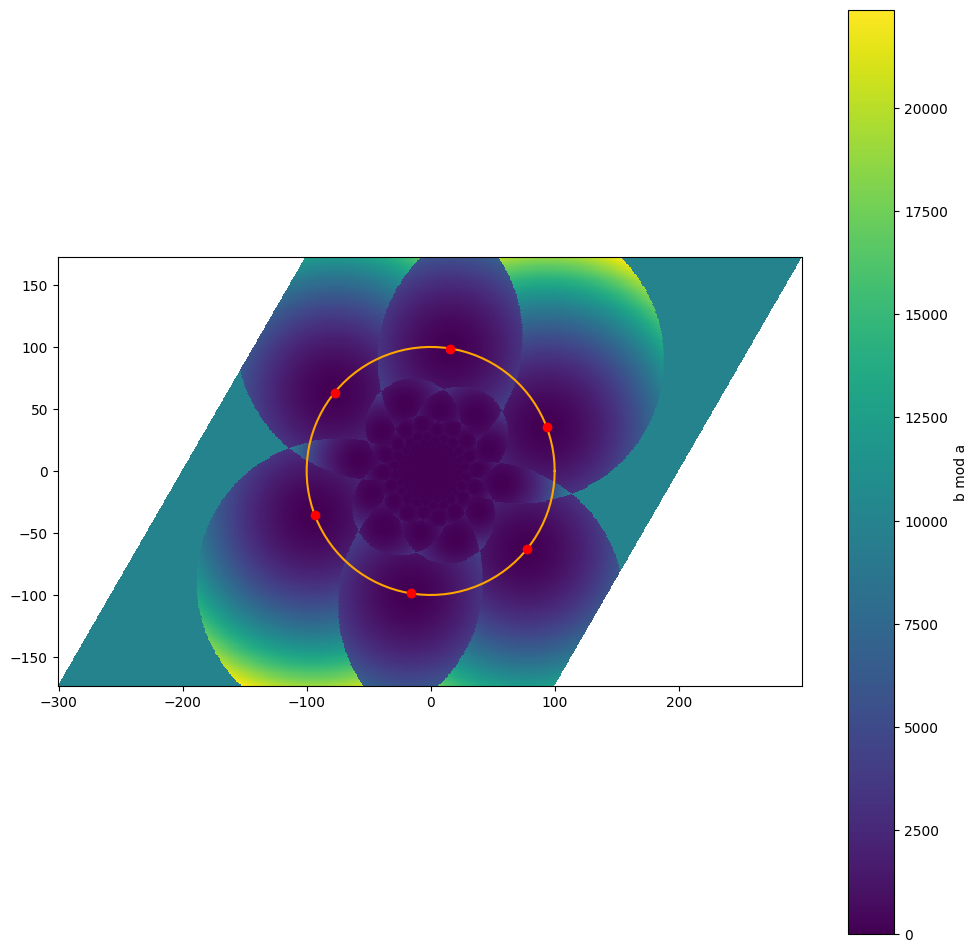

In [20]:
fig, ax = plt.subplots(figsize=(12, 12))

x, y = np.array(range(-grid_size, grid_size)), np.array(range(-grid_size, grid_size))
X, Y = np.meshgrid(x, y, indexing='ij')

X, Y = embed(X, Y)

Z = np.array(quots).reshape(len(x), len(y))

cf = plt.pcolormesh(
    X,
    Y,
    Z,
    cmap='viridis',
    shading='nearest'
)

for assoc in assocs:
    as_x, as_y = embed(assoc.real(), assoc.imaginary())
    ax.scatter(as_x, as_y, color='red', zorder=5)

plt.plot(pts[:,0], pts[:,1], color='orange')

ax.set_aspect('equal')

cbar = plt.colorbar(cf)
cbar.set_label("b mod a")

plt.show()